### **Business Context**

- Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics.
- Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product.
- Segmentation also, focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating.
- Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people



### **Project Objective**

- Based on the given users and items data of an e\-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business



### **DATA Description**

- The datasets contain measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. We collected data from several categories. These datasets contain self\-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements \(etc.\)



### **Attribute Information:**

- **user\_id**: a unique id for the customer
- **item\_id**: unique product id
- **weight**: weight measurement of customer
- **rented for**: purpose clothing was rented for
- **body type**: body type of customer
- **review\_text**: review given by the customer
- **review\_summary**: summary of the review
- **size**: the standardized size of the product
- **rating**: rating for the product
- **age**: age of the customer
- **category**: the category of the product
- **bust size**: bust measurement of customer
- **height**: height of the customer
- **review\_date**: date when the review was written
- **fit**: fit feedback



#### **1. Load the required libraries and read the dataset.**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset
df = pd.read_csv('renttherunway.csv')

#### **2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features**



In [3]:
# Initially reading dataset
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
# Dropping serial no. column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Shape of dataset
df.shape

(192544, 15)

In [6]:
# Renaming columns to improve ease-of-accessibility for pandas:

df.columns = [
    'fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
    'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
    'height', 'size', 'age', 'review_date'
]
df.head(5)

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [7]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust_size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented_for      192534 non-null  object 
 7   review_text     192476 non-null  object 
 8   body_type       177907 non-null  object 
 9   review_summary  192197 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


By looking at the data we can make some initial observations:

- The dataframe contains 192544 entries and 15 columns.

- The dataframe contains multiple missing values across multiple columns which need to be handled.

- Dataframe contains multiple category type columns like 'category', 'rented for' and 'body type' which need to be handled.

- The 'height' column contains a string representation which needs to be converted to numeric.

- The 'weight' column contains measuring unit 'lbs' which needs to be dropped.

- Column names can be renamed for pandas accessibility.



#### **3. Check if there are any duplicate records in the dataset? If any drop them.**



In [8]:
# Checking for duplicate data:

df[df.duplicated(keep=False)]

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
483,fit,61928,34c,1384766,135lbs,10.0,party,This dress runs very tight in the waist. Also...,pear,I rented this dress for a black & white party....,sheath,"5' 4""",12,34.0,"September 20, 2016"
639,fit,61928,34c,1384766,135lbs,10.0,party,This dress runs very tight in the waist. Also...,pear,I rented this dress for a black & white party....,sheath,"5' 4""",12,34.0,"September 20, 2016"
705,fit,952829,36d,1522253,165lbs,8.0,other,You can dress this up or down. Great for vaca...,pear,tons of compliments. Very nice dress,dress,"5' 6""",20,42.0,"April 9, 2015"
1146,fit,188164,36d,1707988,132lbs,10.0,other,The colors of this dress are absolutely beauti...,hourglass,Felt like a Runway Model!,dress,"5' 2""",16,53.0,"August 9, 2017"
1967,fit,491875,NaN,1707988,NaN,10.0,party,"Comfortable, classy, and unique. A great find.",NaN,Gorgeous dress,dress,"5' 4""",8,31.0,"July 24, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188553,fit,213210,34d,1707988,NaN,10.0,wedding,I got so many compliments! The color is so vib...,athletic,Beautiful and Wearable!,dress,"5' 7""",20,28.0,"August 7, 2017"
189032,small,994049,32a,1384766,128lbs,4.0,wedding,"I got my usual size, a 2, and it mostly fit ex...",athletic,Good for the Barbie figures. Odd fit for the r...,sheath,"5' 4""",4,38.0,"October 5, 2017"
189895,fit,932177,36b,1459957,150lbs,10.0,formal affair,I was worried about the length but luckily it ...,pear,Fun dress,dress,"5' 6""",20,53.0,"February 15, 2017"
189970,fit,204984,34b,1522253,119lbs,8.0,everyday,"Dress is great and super comfy, but it runs su...",hourglass,Wore this for my fiance's dirty 30 bday during...,dress,"5' 6""",8,35.0,"June 9, 2015"


- There are around 189 duplicate records.



In [9]:
# Removing duplicate records

df.drop_duplicates(keep=False, inplace=True)
df[df.duplicated(keep=False)]

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date


- No more duplicate data in dataframe.



#### **4. Drop the columns which you think redundant for the analysis.\(Hint drop columns like 'id', 'review'\)**



In [10]:
# Dropping columns that are redundant for the analysis

df.drop(['user_id', 'item_id','review_text','review_summary','review_date'], axis=1, inplace=True)
df.head(5)

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


#### **5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. \(Hint: 'weight' has the suffix as lbs\)**



In [11]:
# Encoding column 'weight' and converting it to float data type

df['weight'] = df['weight'].astype(str).str.replace('lbs','')
df['weight'] = df['weight'].astype(float)

df.head(5)

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


#### **6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with the 'party'.**



In [12]:
#Checking unique categories for column 'rented_for'

df['rented_for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [13]:
# Combining 'party' and 'party: cocktail' categories

df['rented_for'] = df['rented_for'].map({
    'vacation': 'vacation',
    'other': 'other',
    'party': 'party',
    'formal affair': 'formal affair',
    'wedding': 'wedding',
    'date': 'date',
    'everyday': 'everyday',
    'work': 'work',
    'party: cocktail': 'party'
})

df['rented_for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

#### **7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.**



In [14]:
# Converting column 'height' to inches (float data type)

def get_inches(x):
    if type(x) == type(1.0):
        return

    try: 
        return (int(x[0])*12) + (int(x[3:-1]))
    except:
        return (int(x[0])*12)
    
df['height'] = df['height'].apply(get_inches).astype(float)
df.head(5)

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,64.0,4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


#### **8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.**



In [15]:
# Looking at the percentage of missing values per column:

pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})

,total_missing,perc_missing
fit,0,0.000000
bust_size,18373,22.192294
weight,29928,36.149293
rating,80,0.096630
rented_for,10,0.012079
body_type,14613,17.650682
category,0,0.000000
height,673,0.812900
size,0,0.000000
age,960,1.159560


- All columns except 'size', 'category', and 'fit' have missing values.



In [16]:
# Using median imputation for numerical columns 

for col in ['weight','rating','height','age']:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
# Using mode imputation for categorical columns

for col in ['bust_size','rented_for','body_type','category']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
# Recheck missing values after imputation:

pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})

,total_missing,perc_missing
fit,0,0.0
bust_size,0,0.0
weight,0,0.0
rating,0,0.0
rented_for,0,0.0
body_type,0,0.0
category,0,0.0
height,0,0.0
size,0,0.0
age,0,0.0


- No more missing values left in the dataset.



#### **9. Check the statistical summary for the numerical and categorical columns and write your findings.**



In [19]:
# Statistical description of numerical columns

df.describe()

,weight,rating,height,size,age
count,192166.000000,192166.000000,192166.000000,192166.000000,192166.000000
mean,137.020467,9.092659,65.309139,12.246428,33.859575
std,20.145691,1.429982,2.659036,8.497723,8.039723
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,135.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [20]:
# Statistical description of categorical variables

df.describe(include='O')

,fit,bust_size,rented_for,body_type,category
count,192166,192166,192166,192166,192166
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,141760,45598,57700,69844,92620


- The weight range of the customer is 50\-300 lbs with an average of around 137 lbs.
- The average rating is around 9.1.
- The height range of the customer is 54\-78 in with an average of around 65 in.
- The maximum size 58  with an average of around 12.
- The average age of customer is around 34 years.
- Since the min age is 0, we need to impute it with appropriate value and the maximum age needs to  be capped to upper limit.
- Most of the customers rented the product for wedding and the most appeared product category is as dress.



#### **10. Is there outliers present in the column age? If yes treat them with appropriate method.**



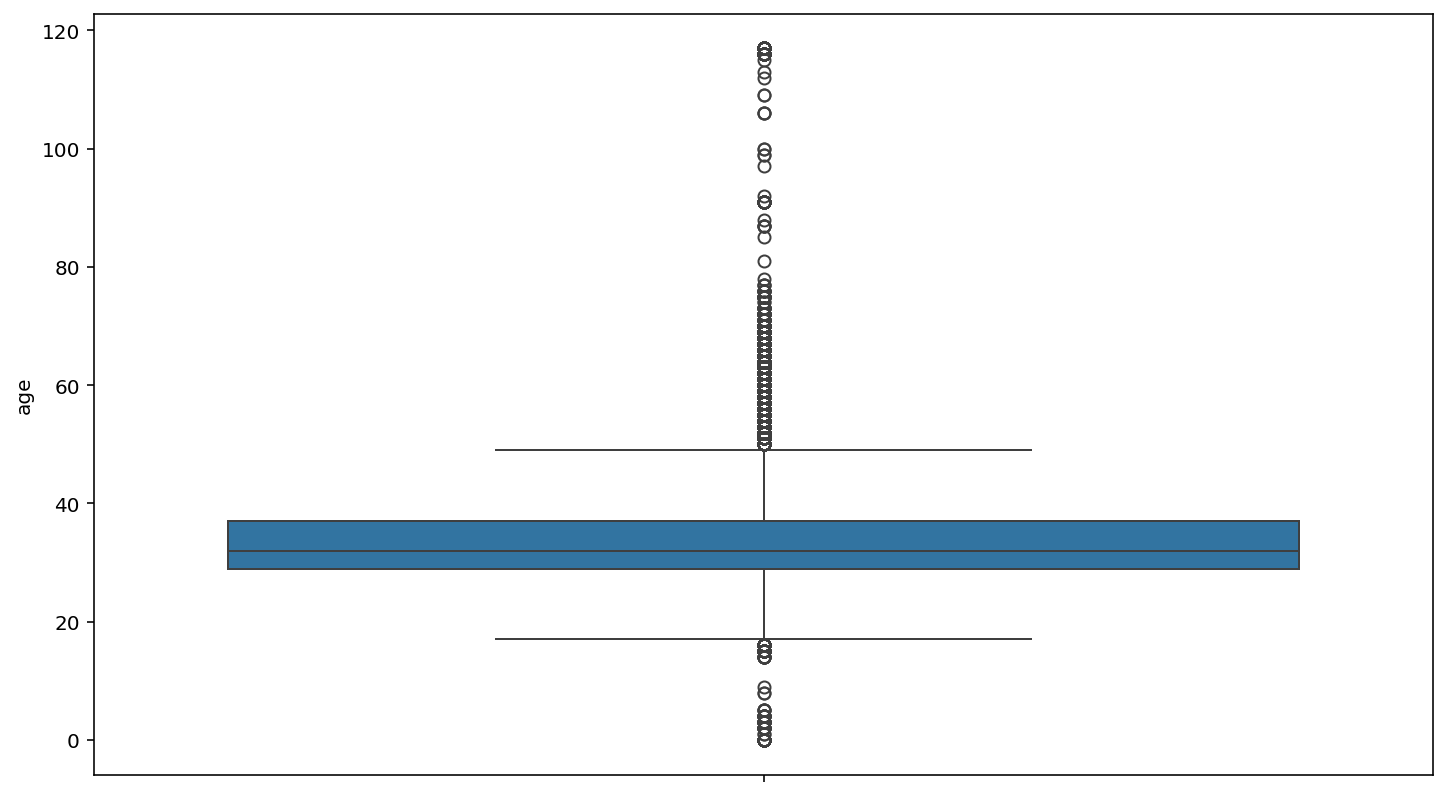

In [21]:
sns.boxplot(df['age'])
plt.show()

In [22]:
# Using Capping method to treat the outliers in 'age' column

# Capping minimum age
df['age'] = pd.DataFrame(np.where(df['age']<=20,20,df['age']))

# Capping maximum age
df['age'] = pd.DataFrame(np.where(df['age']>=100,100,df['age']))

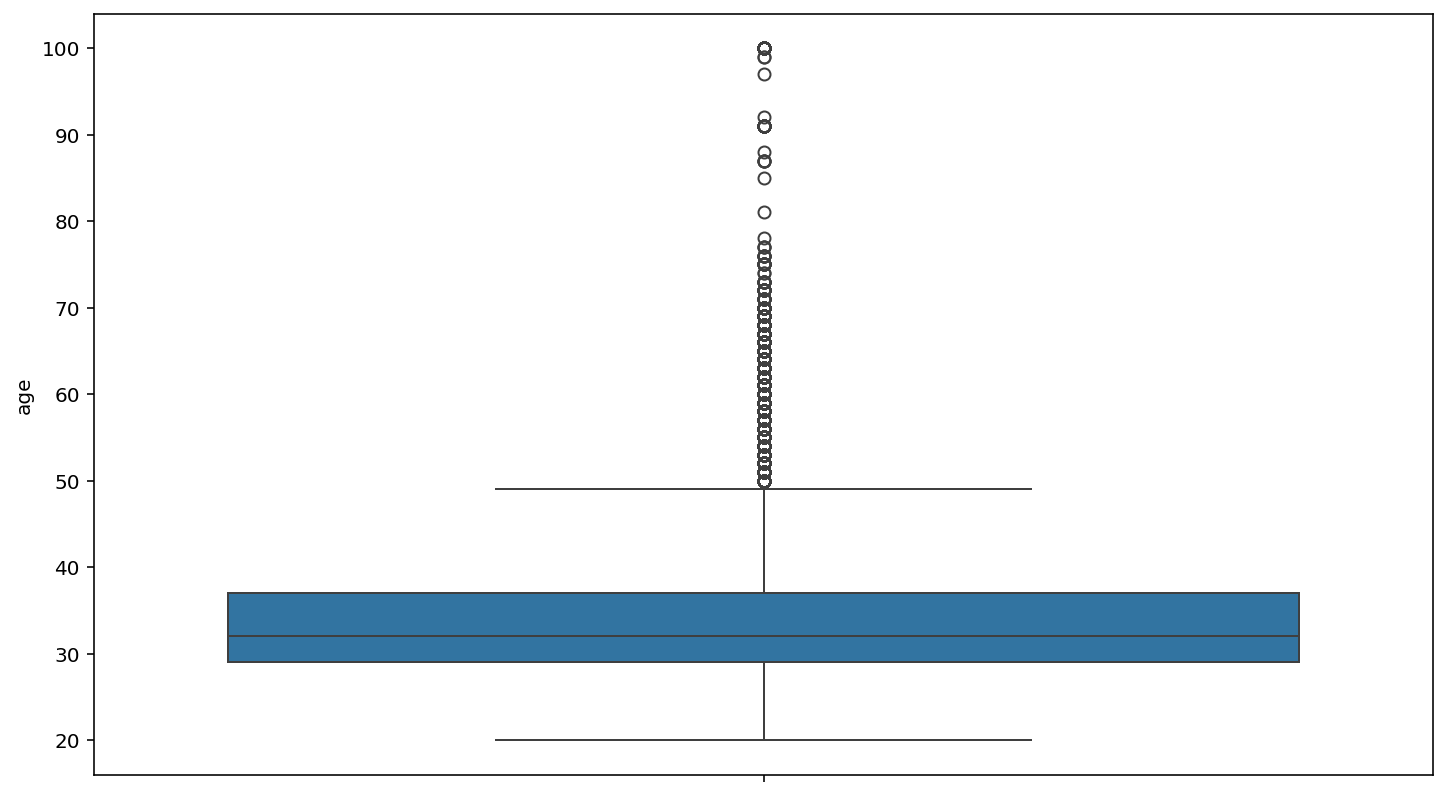

In [23]:
sns.boxplot(df['age'])
plt.show()

In [24]:
# Capping will cause some missing values in column 'age'. We will drop these.

df.dropna(inplace=True)

#### **11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.**



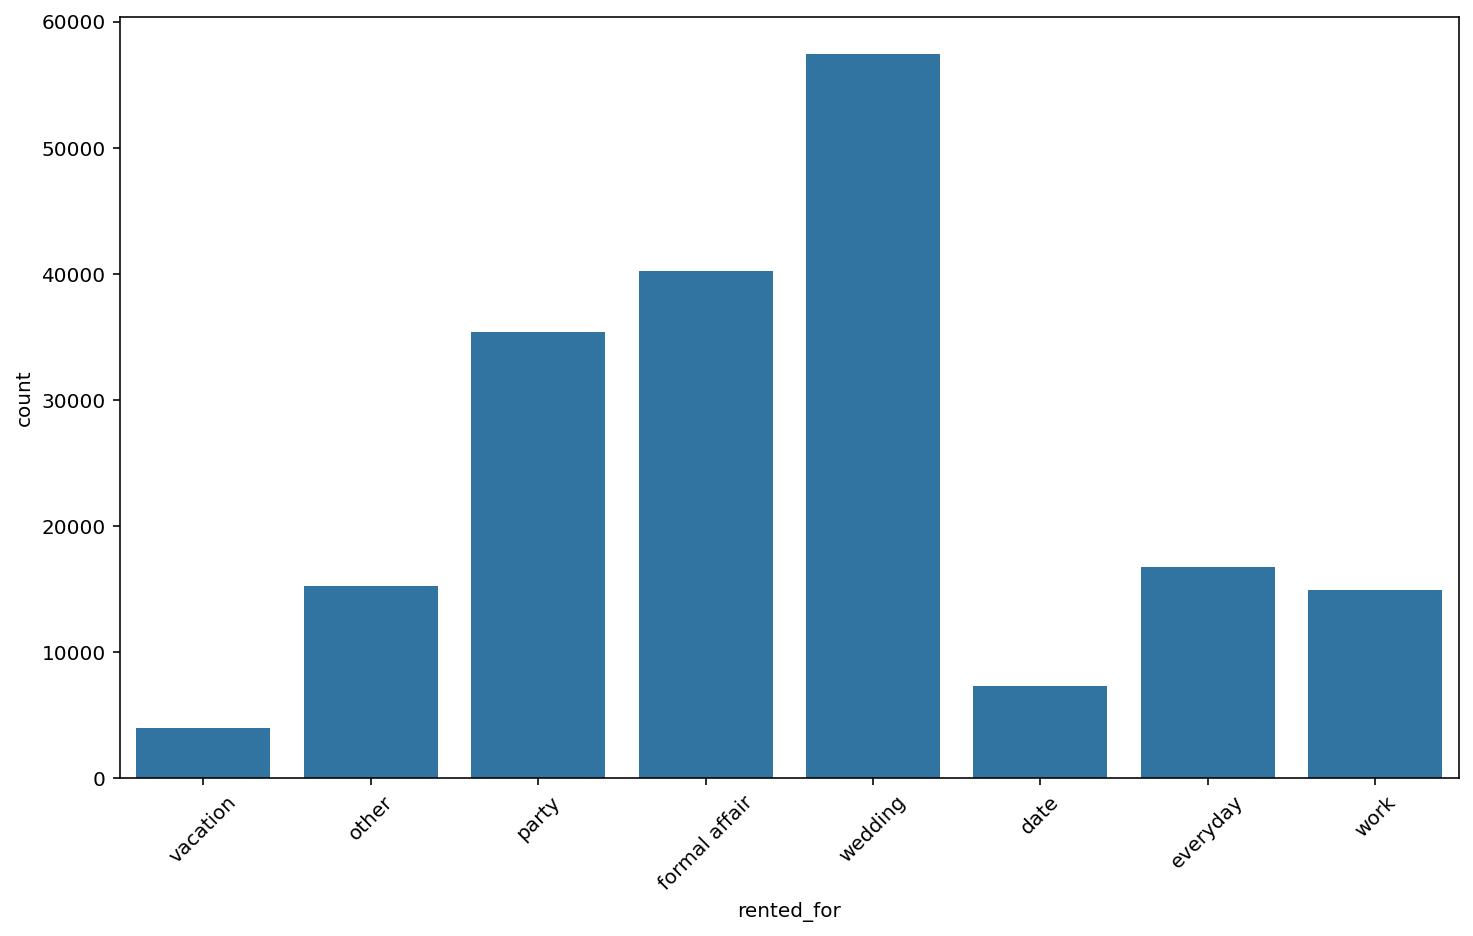

In [25]:
# The distribution of column 'rented_for' using Bar Graph:

sns.countplot(x='rented_for',data = df)
plt.xticks(rotation=45)
plt.show()

- It can be observed that most customers rented the dresses for Wedding followed by Formal Affair and Party.



#### **12. Encode the categorical variables in the dataset.**



In [26]:
# Original dataset
df_orig = df.copy()

In [27]:
# Identifying categorical columns
df.describe(include='object')

,fit,bust_size,rented_for,body_type,category
count,191410,191410,191410,191410,191410
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,141191,45432,57475,69567,92262


In [28]:
# Using label encoder to encode categorical variables

# select object datatype variables
object_variables = [i for i in df.columns if df.dtypes[i] == object]
object_variables 

le = LabelEncoder()

def encoder(df):
    for i in object_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [29]:
df.head(5)

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,135.0,10.0,4,3,45,64.0,4,100.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


- All categorical columns have now been encoded.



#### **13. Standardize the data, so that the values are within a particular range.**



In [30]:
# Standardizing the data using MinMaxScaler

mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df.head()

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,0.0,0.371429,0.348,1.00,0.714286,0.500000,0.656716,0.583333,0.241379,0.1000
1,0.0,0.352381,0.328,1.00,0.428571,1.000000,0.298507,0.500000,0.206897,0.2000
2,0.0,0.352381,0.340,1.00,0.571429,0.500000,0.671642,0.416667,0.068966,1.0000
3,0.0,0.361905,0.340,0.75,0.285714,0.666667,0.238806,0.458333,0.137931,0.1750
4,0.0,0.352381,0.380,1.00,0.857143,0.166667,0.298507,0.625000,0.206897,0.0875


- All values have been scaled to be between 0\-1 using MinMaxScaler approach.



In [31]:
# Standardized Dataset 
df_std = df.copy()

#### **14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90\-95% of the variance in data is explained by the same.**



In [32]:
# 1) Calculating the Co-variance Matrix

cov_matrix = np.cov(df.T)
cov_matrix

array([[ 1.26740744e-01,  3.45754502e-04,  3.88670964e-04,
        -1.55941355e-02,  8.98493432e-04, -7.05948798e-04,
         3.62749548e-06,  1.47102080e-05,  3.41379821e-03,
         9.31806766e-05],
       [ 3.45754502e-04,  1.08875351e-02,  4.78210735e-03,
        -3.97874414e-04, -5.58775265e-05, -5.91383550e-03,
        -2.22649707e-04,  1.70348576e-03,  9.58872653e-03,
         7.77495794e-06],
       [ 3.88670964e-04,  4.78210735e-03,  6.49243306e-03,
        -3.01362212e-04,  2.30007686e-04, -4.96213952e-03,
        -2.22656892e-04,  3.11661808e-03,  8.53703970e-03,
        -1.00885033e-05],
       [-1.55941355e-02, -3.97874414e-04, -3.01362212e-04,
         3.19689846e-02,  6.67481813e-04,  2.20198848e-04,
        -8.05138382e-04,  3.50143139e-05, -9.65602787e-04,
        -2.86902299e-05],
       [ 8.98493432e-04, -5.58775265e-05,  2.30007686e-04,
         6.67481813e-04,  8.65942558e-02, -7.04281237e-04,
        -3.23358431e-03, -5.63284179e-04,  2.19274625e-04,
         8.

In [33]:
# 2) Calculating the Eigenvalues and Eigenvectors.

eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigenvalues : ','\n',eig_vals)
print('\n')
print('Eigenvectors : ','\n',eig_vectors)

Eigenvalues :  
 [0.1293999  0.08683582 0.07225813 0.03631675 0.02966323 0.02838271
 0.00235794 0.00516477 0.01126362 0.00988402]


Eigenvectors :  
 [[-9.86367539e-01 -1.72370817e-02 -2.68826486e-02  1.73973963e-02
  -1.51897872e-01 -4.97925445e-02  6.47266532e-03 -1.18442740e-02
   4.67559363e-03 -5.57727267e-04]
 [-7.49916560e-03  4.19854867e-03  1.35168079e-01  1.90253652e-02
   2.04936495e-01 -3.73916892e-01 -1.22891745e-01 -8.62716120e-01
  -2.00198256e-01 -4.48614615e-03]
 [-7.08770967e-03  6.66160910e-03  1.12278439e-01  1.63057155e-02
   1.65623253e-01 -3.06837701e-01  9.27441650e-01  4.49688399e-02
   5.72903606e-02  4.80695178e-04]
 [ 1.58193364e-01  1.75566591e-02 -2.65111808e-03  1.03053340e-01
  -8.64810819e-01 -4.64787154e-01  9.66652918e-04 -1.10051585e-03
  -1.05977510e-02  5.42858604e-04]
 [-1.86750991e-02  9.96573888e-01 -4.54071641e-02 -6.53585863e-02
   9.08692370e-03 -2.87295746e-05 -2.62962995e-03 -2.79014688e-03
   7.74560733e-03 -9.50993521e-04]
 [ 1.85308660e-

In [34]:
# 3) Calculating Explained and Cummulative Variance Explained

total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance : ',var_exp)
print('')
print('Cummulative Variance Explained : ',cum_var_exp)

Explained Variance :  [31.44385034352897, 21.100884697230867, 17.55854448288754, 8.824878468849445, 7.20809126510253, 6.89692607385404, 2.7370321052911555, 2.4017928329308638, 1.255025208215843, 0.5729745221087502]

Cummulative Variance Explained :  [ 31.44385034  52.54473504  70.10327952  78.92815799  86.13624926
  93.03317533  95.77020744  98.17200027  99.42702548 100.        ]


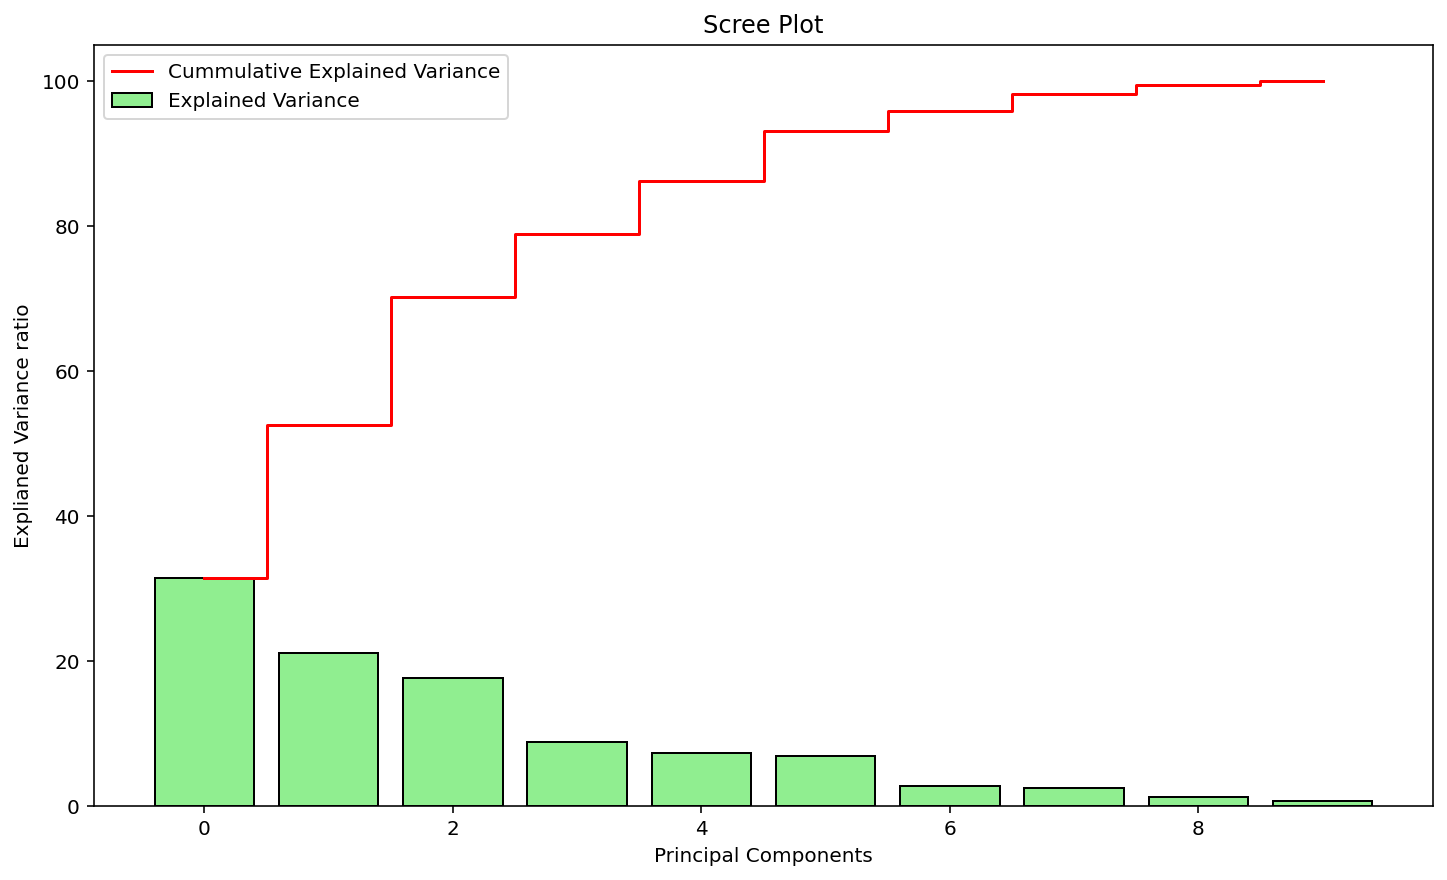

In [35]:
# 4) Plotting Scree Plot

plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- From the above scree plot, it can be observed that the first 6 principal components explain ~ 90\-95% of the variation,
- Hence, the optimal number of principal components can be determined as 6.



#### **15. Apply K\-means clustering and segment the data \(You may use original data or PCA transformed data\)**



1. Find the optimal K Value using elbow plot for K\-Means clustering.
2. Build a K\-Means clustering model using the obtained optimal K value from the elbow plot.
3. Compute silhouette score for evaluating the quality of the K\-Means clustering technique.



In [36]:
# We use the dimensions determined above(i.e. 6) to apply clustering on data

pca = PCA(n_components=6)

pca_df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.209198,-0.136550,0.009754,0.296489,-0.067245,0.110925
1,-0.225634,0.147327,-0.476671,-0.079380,-0.001159,0.151279
2,-0.217758,0.006892,-0.037520,0.310338,-0.150847,-0.044000
3,-0.185004,0.275894,-0.165404,-0.117137,0.147703,-0.098400
4,-0.201658,-0.316254,0.318661,-0.045981,-0.092237,-0.012968


- These are the new dimensions obtained from the application of PCA.

#### **K\-Means clustering using the PCA transformed data**



In [37]:
# We apply K-Means clustering to obtain the optimal K-Value using lbow Plot

cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [38]:
# Creataing a dataframe of number of clusters and cluster errors.

cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

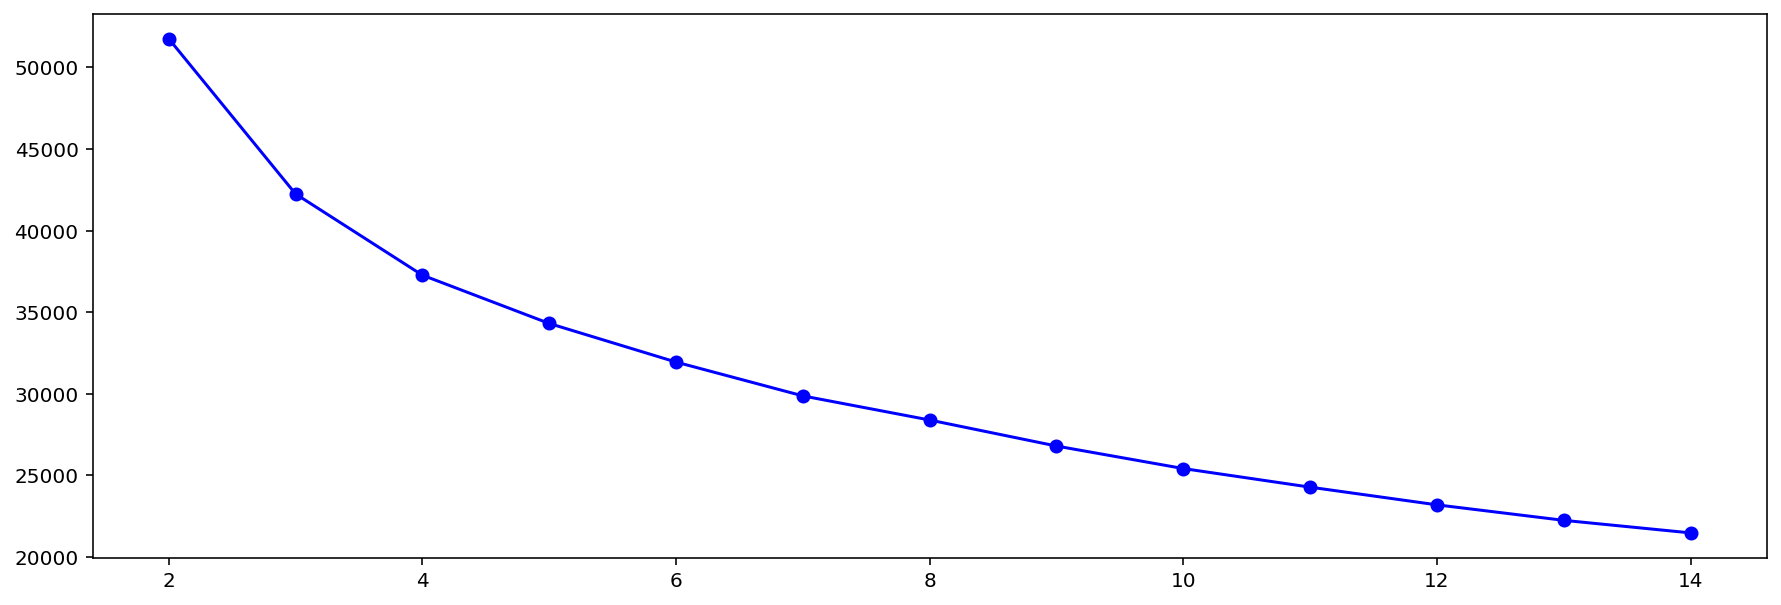

In [39]:
# Drawing an Elbow plot for the above dataframe

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the above elbow plot we can see at the cluster K=3, the inertia significantly decreases . Hence we can select our optimal clusters as K=3.

In [40]:
# Applying KMeans clustering for the optimal number of clusters(3) obtained from the Elbow plot.

kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [41]:
# Creating a dataframe of the labels.

label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [42]:
# Joining the label dataframe to the pca_df dataframe.

kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,-0.209198,-0.136550,0.009754,0.296489,-0.067245,0.110925,2
1,-0.225634,0.147327,-0.476671,-0.079380,-0.001159,0.151279,1
2,-0.217758,0.006892,-0.037520,0.310338,-0.150847,-0.044000,2
3,-0.185004,0.275894,-0.165404,-0.117137,0.147703,-0.098400,1
4,-0.201658,-0.316254,0.318661,-0.045981,-0.092237,-0.012968,2


In [43]:
kmeans_df['Label'].value_counts()

Label
2    82224
1    65608
0    43578
Name: count, dtype: int64

In [44]:
# Applying Silhouette Score to find the optimal clusters 

from sklearn.metrics import silhouette_score
for i in range(2,15):
    kmeans = KMeans(i,random_state=100)
    kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i,silhouette_score(pca_df,labels))

2 0.3370258849787605
3 0.2455179974392077
4 0.2394257691076803
5 0.22614421564935072
6 0.19932974588103863
7 0.2137080043643239
8 0.21192474391854002
9 0.2143104896323449
10 0.22544597560188478
11 0.2115864244224006
12 0.2142743722072468
13 0.21757104305529132
14 0.22337571760908057


- We chose the optimal K-Value as 3 from the Elbow Plot and built a K-means clustering model with it.
- We applied the Silhouette Score to the model to determine the optimal clusters.
- From the Silhouette score we observed that for clusters 2 and 3, the score was the highest. We can build Kmeans clustering model using the optimal K-value as either 2 or 3.

### **16. Apply Agglomerative clustering and segement the data. \(You may use original data or PCA transformed data\)**



- Find the optimal K Value using dendrogram for Agglomerative clustering.
- Build a Agglomerative clustering model using the obtained optimal K value from observed from dendrogram.
- Compute silhoutte score for evaluating the quality of the Agglomerative clustering technique.
  \(Hint: Take a sample of the dataset for agglomerative clustering\)



### **Agglomerative clustering \(using original data\)**



- We use a copy of the cleaned dataset after encoding and standardization \(df\_std\)
- Since dataset is huge plotting dendrogram might be time consuming. Hence, we take a sample of this huge dataset.



In [44]:
# Taking a sample of 50K rows from the df_std dataframe using random sampling technique provided by pandas 

#  We create a new dataframe for this sample called 'df_std_sample' 
df_std_sample = df_std.sample(n=5000)

# Resetting the index
df_std_sample.reset_index(inplace=True,drop=True)

In [45]:
df_std_sample.head(5)

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,1.0,0.361905,0.320,0.75,0.571429,0.166667,0.238806,0.500000,0.137931,0.2500
1,0.0,0.352381,0.240,1.00,0.571429,0.500000,0.238806,0.416667,0.017241,0.1000
2,0.0,0.238095,0.232,1.00,0.285714,0.166667,0.298507,0.333333,0.017241,0.1750
3,0.0,0.371429,0.440,0.75,0.857143,0.500000,0.238806,0.500000,0.344828,0.1125
4,0.0,0.333333,0.336,1.00,0.285714,1.000000,0.238806,0.541667,0.068966,0.1250


### **Dendrogram**



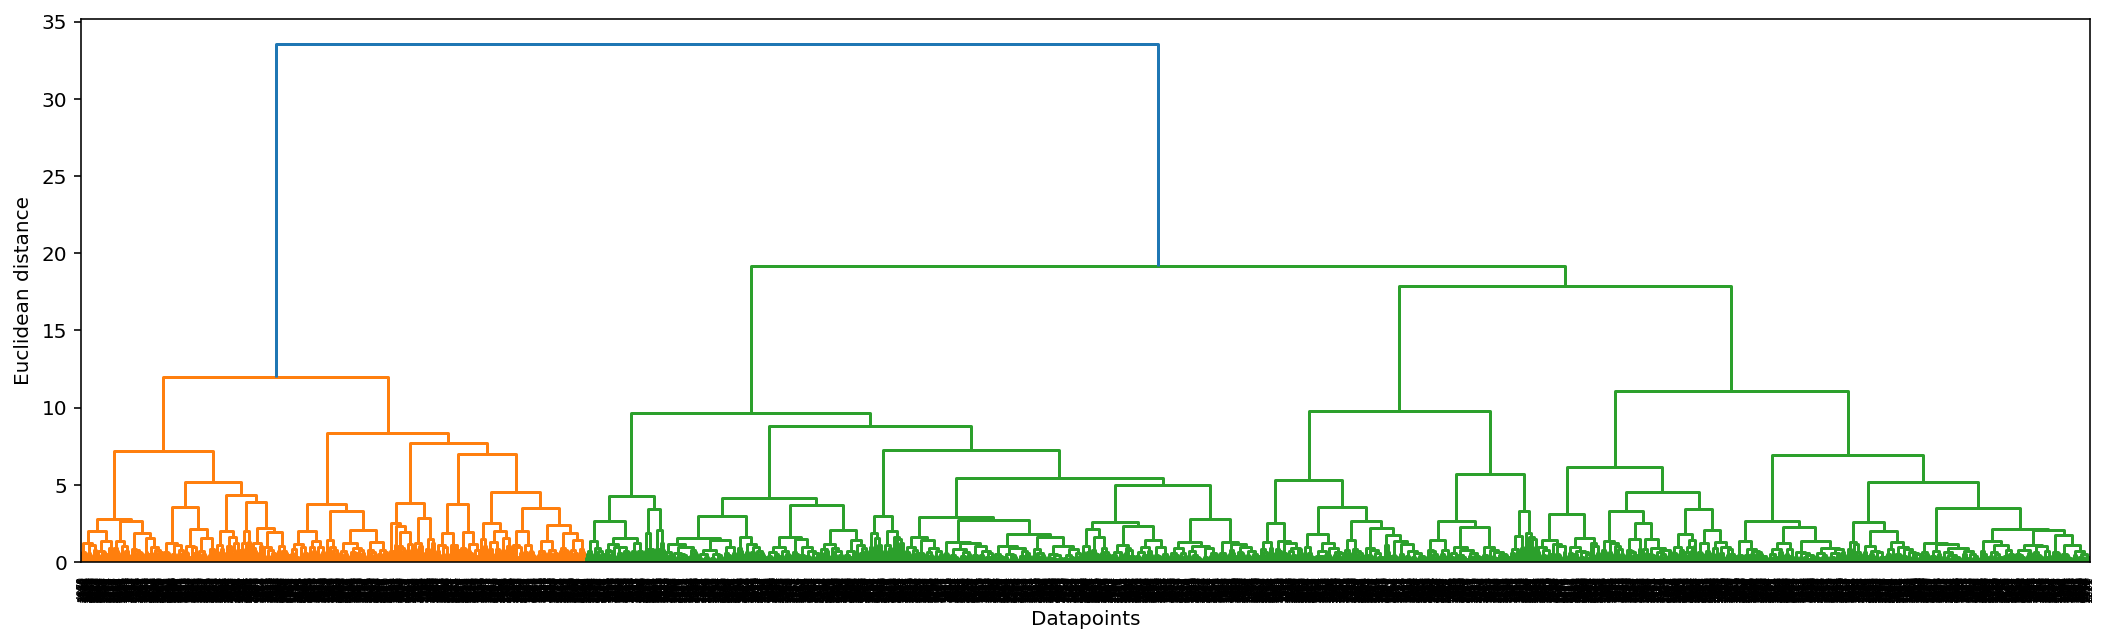

In [46]:
plt.figure(figsize=[18,5])
merg = linkage(df_std_sample, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

- We look for the largest distance that we can vertically observe without crossing any horizontal line.
- We can observe from the above dendrogram that we can choose optimal clusters has 2.

In [47]:
# Building hierarchical clustering model using the optimal clusters as 2

hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(df_std_sample)

In [48]:
# Creating a dataframe of the labels

df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,0
3,0
4,0


In [49]:
# Joining the label dataframe with unscaled initial cleaned dataframe (df_orig)

df_hier = df_orig.join(df_label1)
df_hier.head()

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,1.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,0.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4,100.0,0.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,0.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,0.0


In [50]:
# Claculating Silhouette Score for this dataframe

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_std_sample)
    labels = hier.fit_predict(df_std_sample)
    print(i,silhouette_score(df_std_sample,labels))

2 0.31222490555814264


3 0.17680291428599557


4 0.19336245777442063


5 0.1833682093057335


6 0.17392502807624427


7 0.16708599078369632


8 0.1773905976604101


9 0.16247774553023425


10 0.1597957069744488


11 0.1644574756227772


12 0.1681006121772081


13 0.17153025482990047


14 0.17700472433346331


- We can observe from the silhouette scores for the agglomerative clustering for the 2 clusers the silhouette score is higher.

### **17. Conclusion**



- Perform cluster analysis by doing bivariate analysis between cluster label and different features and write your conclusion on the results.

In [51]:
df_hier.head(5)

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,1.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,0.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4,100.0,0.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,0.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,0.0


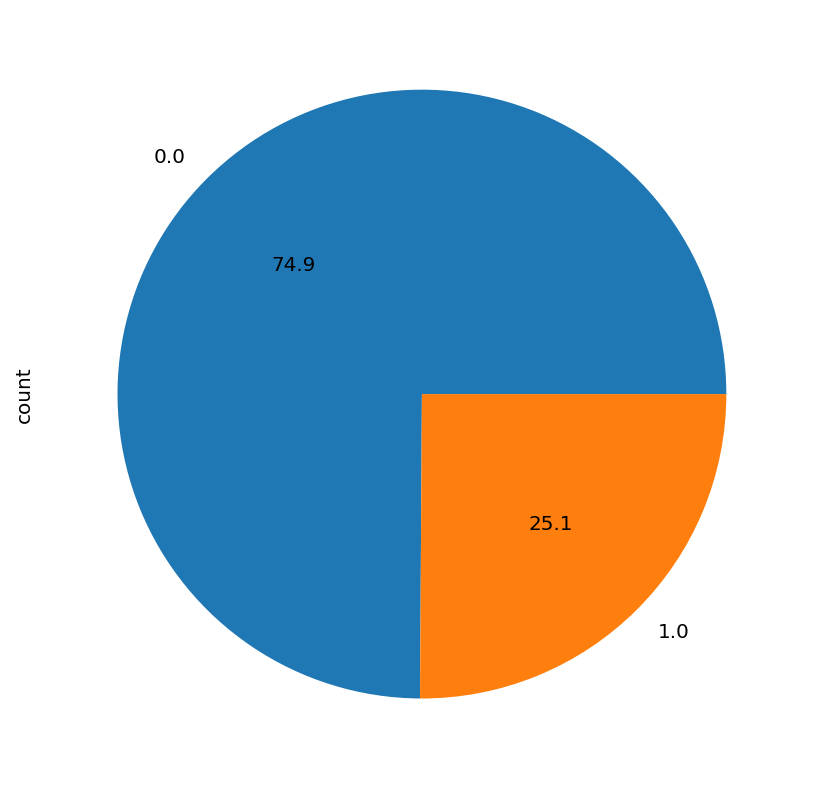

In [52]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

- We can observe that the clusters formed are imbalanced. The number of records assigned to cluster 0 are much more than that assigned to cluster 1.



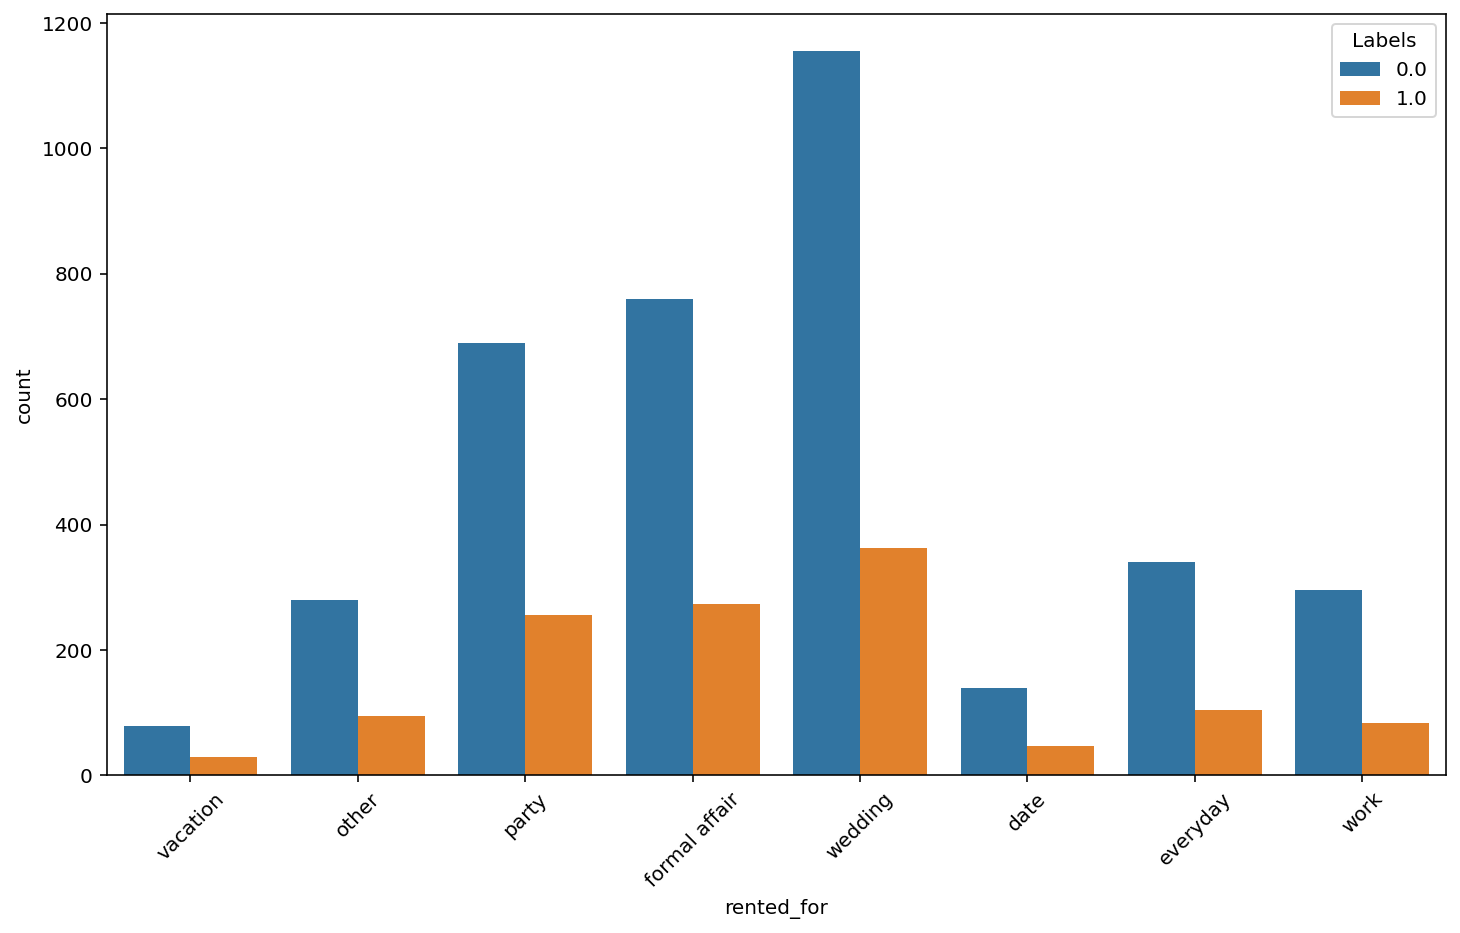

In [53]:
# We visualize the distribution of different categories w.r.t the 'rented_for' column with the clusters formed by the Agglomerative Clustering technique.

sns.countplot(x='rented_for',hue='Labels',data = df_hier)
plt.xticks(rotation=45)
plt.show()

- From the above plot, we can observe that most of the customers rented the product for 'Wedding' purpose.
- Further, we can observe that much more records belong to cluster 0 as compared to cluster 1.



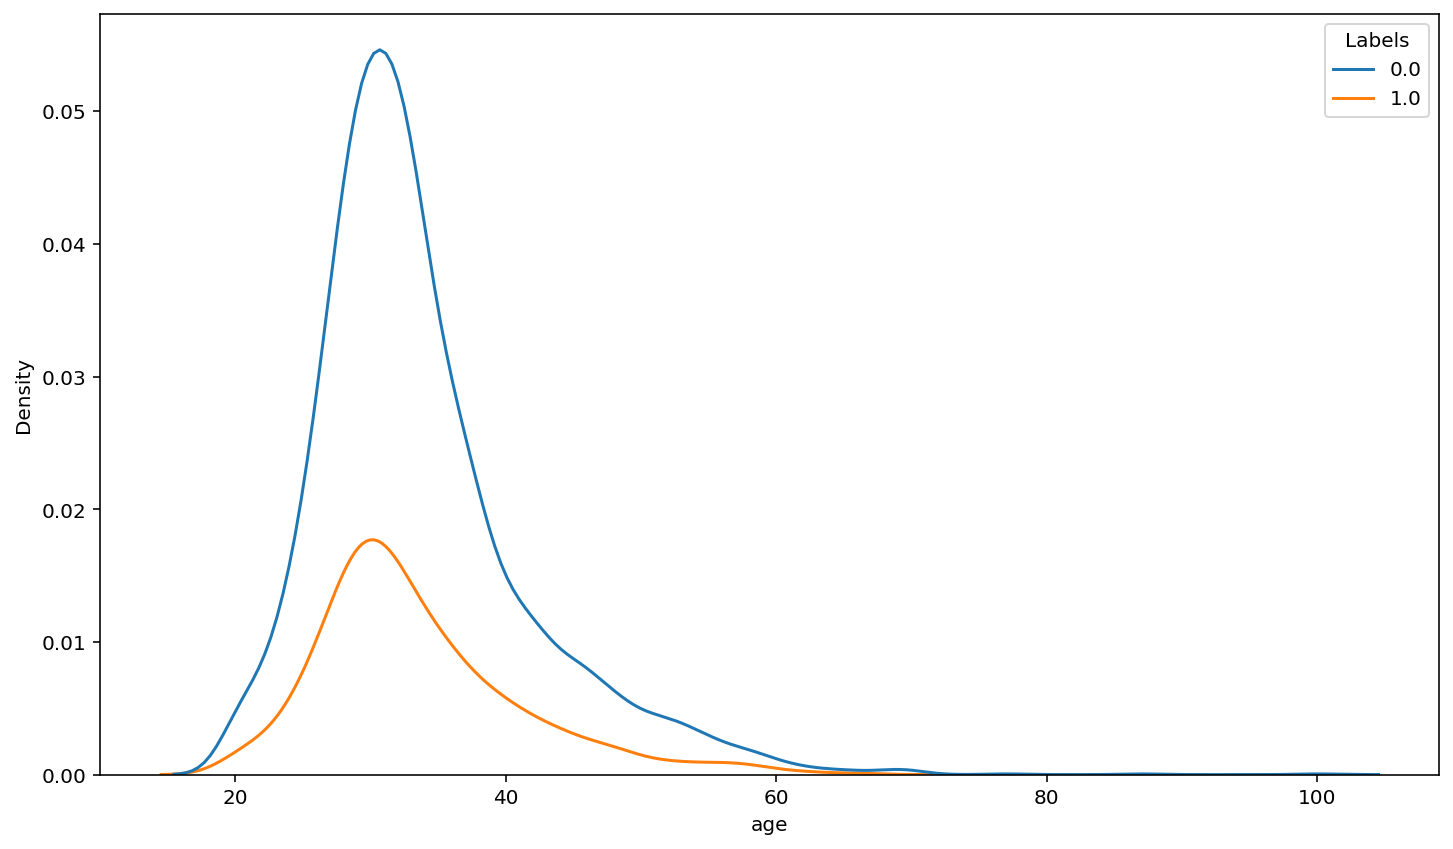

In [54]:
# Now we check the age distribution of the different clusters.

sns.kdeplot(x='age',hue='Labels',data=df_hier)
plt.show()

- Observing the above plot, we can conclude that the distribution of age is almost the same for different clusters. The difference in plot for both clusters is due to more records being assigned to the cluster 0 \(~ 75%\) than to cluster 1.



### **Final Conclusions**



- This project was conducted to study the 'renttherunway' dataset and observe the various customer habits in buying or renting clothing.
- We applied standard data processing to clean and standardize the dataset and make it more readable.
- We applied Principal Component Analysis on this dataset with 6 selected PCA components. This gave us ~90\-95% variance.
- We applied clustering using the dimensions from the PCA and segment the similar data using K\-Means Clustering technique.
- We visualize the clustered data using an Elbow plot and find its optimal K Value.
- We then computed the Silhouette Score for different K Values to compare and evaluate the validity of clustering technique used.
- We the took a sample \(n=50000\) of the original processed and standardized dataset. We used this sample dataset to perform Agglomerative Clustering.
- We plotted a Dendrogram and analyzed the optimal number of classes. We built an Agglomerative Clustering model using the obtained K Value.
- We again computed the Silhouette Score for this to evaluate its validity.
- This dataset contained few features that can be studied and used to segment customers. A dataset with much more diverse cayegorical information about customer habits and specifications such as income, geolocation, sentiment and ideology, lifestyle, hobb es and sentiment towards different products, categories, price points, etc could prove much more useful in clustering customers based on their habits.
- A dataset consisting of much more details about customer habits and behaviors in general will lead to a much more effective categorization and segmentation. This will lead to model which can help companies be more focused on the customer behaviours and perosnalities they want to target for their products. This specialized and targetted approcah will lead to and much more optimal marketing campaign and higher profits.

